<a href="https://colab.research.google.com/github/dhanush22885/Twitter-Sentiment-Analysis-using-ML-/blob/main/Sentiment_analy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 40.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=491ec16712e07e2610b0140a4fbdae6dbdf7125ce4563399eb173c6704f8779f
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [84]:
#importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,ConfusionMatrixDisplay


In [85]:
#creating the dataframe
data=pd.read_csv('/content/tweets.csv')
data.head()

,id,created_at,text,location
0,1083193473539420160,2019-01-10 02:47:03,@CIBC please explain to me why I want to remai...,Canada
1,1083191479215026176,2019-01-10 02:39:08,"RT @CIBCLiveLabs: We are pleased to announce, ...","Oshawa, Ontario"
2,1083184422709575683,2019-01-10 02:11:05,CIBC World Markets Inc. Decreases Holdings in ...,The Netherlands
3,1083182915826126848,2019-01-10 02:05:06,Le patron de la Banque @cibc s’attend à un ral...,Montréal
4,1083177871881818112,2019-01-10 01:45:03,Your home is a valuable asset. Use your equity...,"Lower Mainland, BC"


In [86]:
#information about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1951 non-null   int64 
 1   created_at  1951 non-null   object
 2   text        1951 non-null   object
 3   location    1509 non-null   object
dtypes: int64(1), object(3)
memory usage: 61.1+ KB


In [87]:
#checking the missing values in each columns
data.isnull().sum()

,0
id,0
created_at,0
text,0
location,442


In [88]:
#Storing the 'text' column separately in the variable data_text
data_text=data[['text']]
data_text.head()

,text
0,@CIBC please explain to me why I want to remai...
1,"RT @CIBCLiveLabs: We are pleased to announce, ..."
2,CIBC World Markets Inc. Decreases Holdings in ...
3,Le patron de la Banque @cibc s’attend à un ral...
4,Your home is a valuable asset. Use your equity...


In [89]:
#printing the first two texts from DataFrame

print(data_text['text'].iloc[0],"\n")
print(data_text['text'].iloc[1],"\n")

@CIBC please explain to me why I want to remain an #aventura card holder. I called the travel concierge number to b… https://t.co/RWeLdF1pyv 

RT @CIBCLiveLabs: We are pleased to announce, @CIBC Innovation Banking has provided debt financing for @callruby in support of their acquis… 



In [90]:
#Filling 'unknown' name in place of missing values

data['location'].fillna('unknown',inplace=True)

<ipython-input-90-2117547831>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['location'].fillna('unknown',inplace=True)


In [91]:
#checking the missing values

data.isnull().sum()

,0
id,0
created_at,0
text,0
location,0


In [92]:
#detection of language
def detect_lang(text):
    try:
        lang=detect(text)
        return lang
    except:
        return None
data['language']=data['text'].apply(detect_lang)
data_text['language']=data_text['text'].apply(detect_lang)

<ipython-input-92-3408424223>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['language']=data_text['text'].apply(detect_lang)


In [93]:
#Dropping all the texts that are not in english

data_text.drop(data_text[data_text['language']!='en'].index,inplace=True)
data_text.value_counts('language')

<ipython-input-93-2424670012>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text.drop(data_text[data_text['language']!='en'].index,inplace=True)


,count
language,
en,1810


In [94]:
#Printing the first 10 rows from data_text

data_text.head(10)

,text,language
0,@CIBC please explain to me why I want to remai...,en
1,"RT @CIBCLiveLabs: We are pleased to announce, ...",en
2,CIBC World Markets Inc. Decreases Holdings in ...,en
4,Your home is a valuable asset. Use your equity...,en
5,Both #CIBC and #BMO ads at the Chicago Black H...,en
6,Finally seeing this!! And with 150 other LGBTQ...,en
7,I checked in at CIBC Theatre on #Yelp https://...,en
8,RT @AmedeoTarnaucea: CIBC refunds customers wh...,en
9,RT @AmedeoTarnaucea: CIBC refunds customers wh...,en
10,America: The Musical Midwest edition @ CIBC Th...,en


In [95]:
#Defining the polarity function

def polarity(text):
    return TextBlob(text).sentiment.polarity

In [96]:
data_text['polarity']=data_text['text'].apply(polarity)


<ipython-input-96-2102238904>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['polarity']=data_text['text'].apply(polarity)


In [97]:
def sent_analy(polarity):
  if polarity < 0:
    return "Negative Statement"
  elif polarity==0:
    return "Neutral Statement"
  else:
    return "Positive Statement"

In [98]:
data_text['sentimentType']=data_text['polarity'].apply(sent_analy)
data_text['location']=data['location']
data_text.head()

<ipython-input-98-3977601872>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['sentimentType']=data_text['polarity'].apply(sent_analy)
<ipython-input-98-3977601872>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['location']=data['location']


,text,language,polarity,sentimentType,location
0,@CIBC please explain to me why I want to remai...,en,0.000000,Neutral Statement,Canada
1,"RT @CIBCLiveLabs: We are pleased to announce, ...",en,0.500000,Positive Statement,"Oshawa, Ontario"
2,CIBC World Markets Inc. Decreases Holdings in ...,en,0.000000,Neutral Statement,The Netherlands
4,Your home is a valuable asset. Use your equity...,en,0.187500,Positive Statement,"Lower Mainland, BC"
5,Both #CIBC and #BMO ads at the Chicago Black H...,en,-0.166667,Negative Statement,Northern Virginia


Text(0.5, 1.0, 'Percentage of sentiments')

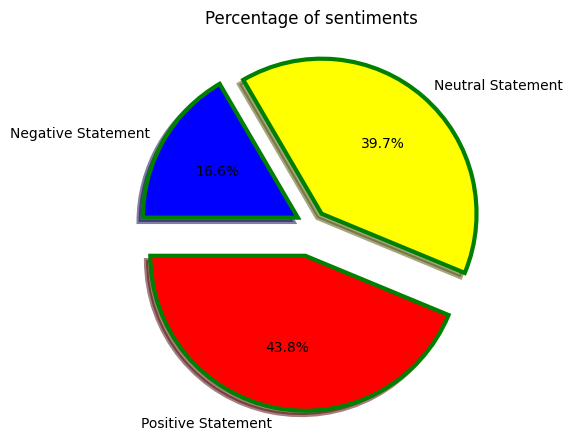

In [99]:
#Visualize the Percentage of Sentiments using piechart

fig = plt.figure(figsize=(5,8))
color = ("red", "yellow", "blue")
ex = {'linewidth':3, 'edgecolor':"green"}
sent = data_text['sentimentType'].value_counts()
sent.plot(kind='pie', autopct='%1.1f%%',wedgeprops = ex, explode=(0.2,0.1,0.1), shadow=True, colors = color,
         startangle=180,  label='')
plt.title('Percentage of sentiments')

In [100]:
# Dayofweek
data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce')
data['day_of_Week'] = data['created_at'].dt.dayofweek
data['day_of_Week'] = data['day_of_Week'].replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday',4:'Friday', 5:'Saturday',6:'Sunday'})

In [113]:
data.value_counts(
    'day_of_Week'
)


,count
day_of_Week,
Wednesday,479
Monday,470
Tuesday,356
Friday,254
Thursday,225
Saturday,97
Sunday,70


In [114]:
data['day_of_Month'] = data['created_at'].dt.month
data['day_of_Month'] = data['day_of_Month'].replace({ 1:'January', 2:'February', 3:'March',4:'April', 5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [115]:
data.value_counts(
    'day_of_Month'
)


,count
day_of_Month,
January,1712
December,239


<ipython-input-102-2453292318>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette="viridis",saturation=0.6,linewidth=0.4,edgecolor='red'


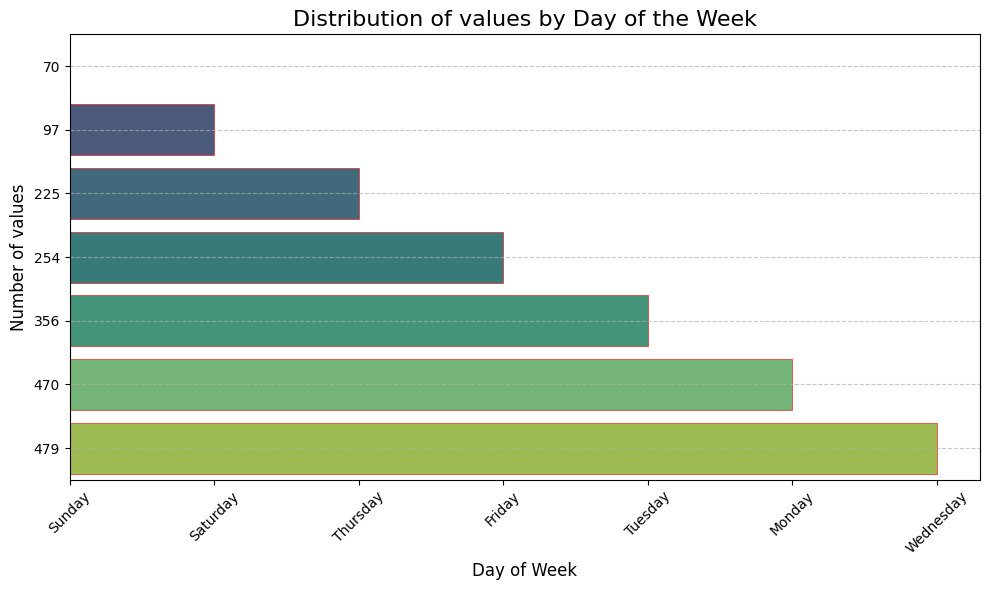

In [102]:
#Visualize the number tweets by week

day_counts = data['day_of_Week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    fill_value=0
)

plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette="viridis",saturation=0.6,linewidth=0.4,edgecolor='red'
,orient='h')

# Step 4: Add titles and labels
plt.title('Distribution of values by Day of the Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of values', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Step 5: Show plot
plt.show()

In [103]:
positive_sent = data_text[data_text.sentimentType == 'Positive Statement']
negative_sent = data_text[data_text.sentimentType == 'Negative Statement']

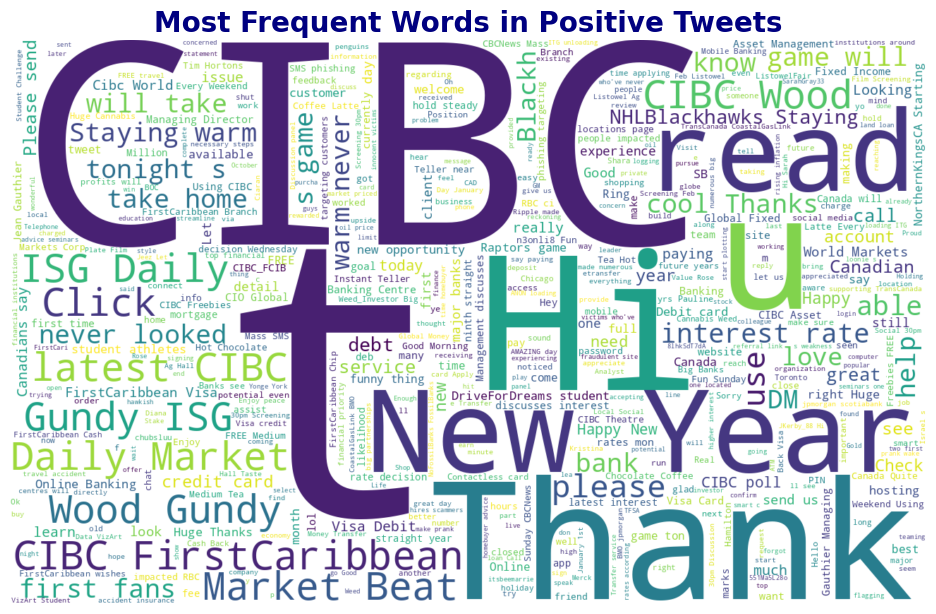

In [104]:
#Combine all text from the positive tweets
from wordcloud import STOPWORDS

text = ' '.join(positive_sent['text'].astype(str))

# Define additional stopwords if needed
custom_stopwords = set(STOPWORDS).union({'https', 'co', 'RT', 'amp'})

# Create the WordCloud object with enhanced parameters
wordcloud = WordCloud(
    width=1300,
    height=800,
    max_words=500,
    background_color='white',       # better than transparent for display
    colormap='viridis',             # modern and colorblind-friendly
    stopwords=custom_stopwords,
    contour_color='steelblue',      # optional border style
    contour_width=1.5,
    random_state=42
).generate(text)

# Set up the plot
plt.figure(figsize=(10, 10), facecolor='white')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequent Words in Positive Tweets', fontsize=20, fontweight='bold', color='navy')
plt.tight_layout(pad=3)
plt.show()


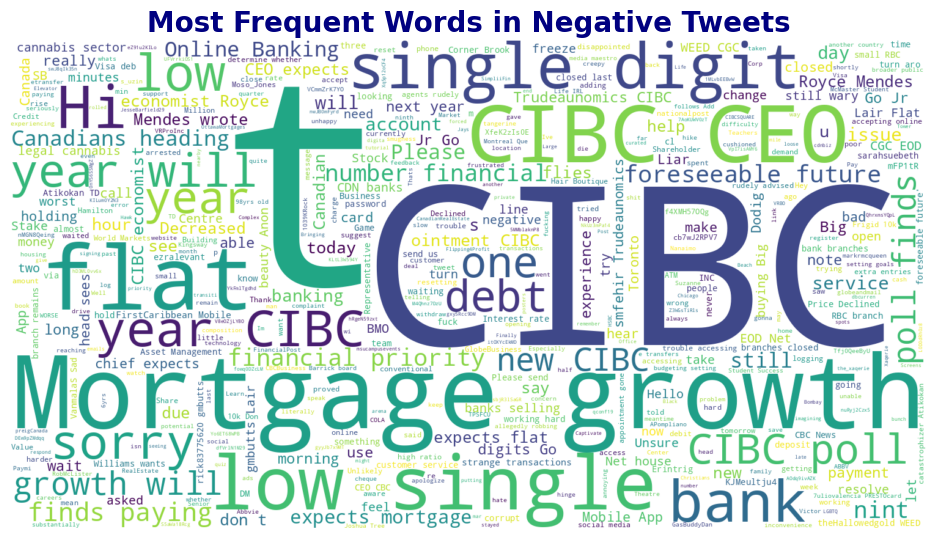

In [105]:
# Combine all text from the positive tweets
text = ' '.join(negative_sent['text'].astype(str))

# Define additional stopwords if needed
custom_stopwords = set(STOPWORDS).union({'https', 'co', 'RT', 'amp'})

# Create the WordCloud object with enhanced parameters
wordcloud = WordCloud(
    width=1500,
    height=800,
    max_words=500,
    background_color='white',       # better than transparent for display
    colormap='viridis',             # modern and colorblind-friendly
    stopwords=custom_stopwords,
    contour_color='steelblue',      # optional border style
    contour_width=1.5,
    random_state=42
).generate(text)

# Set up the plot
plt.figure(figsize=(10, 10), facecolor='white')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequent Words in Negative Tweets', fontsize=20, fontweight='bold', color='navy')
plt.tight_layout(pad=3)
plt.show()


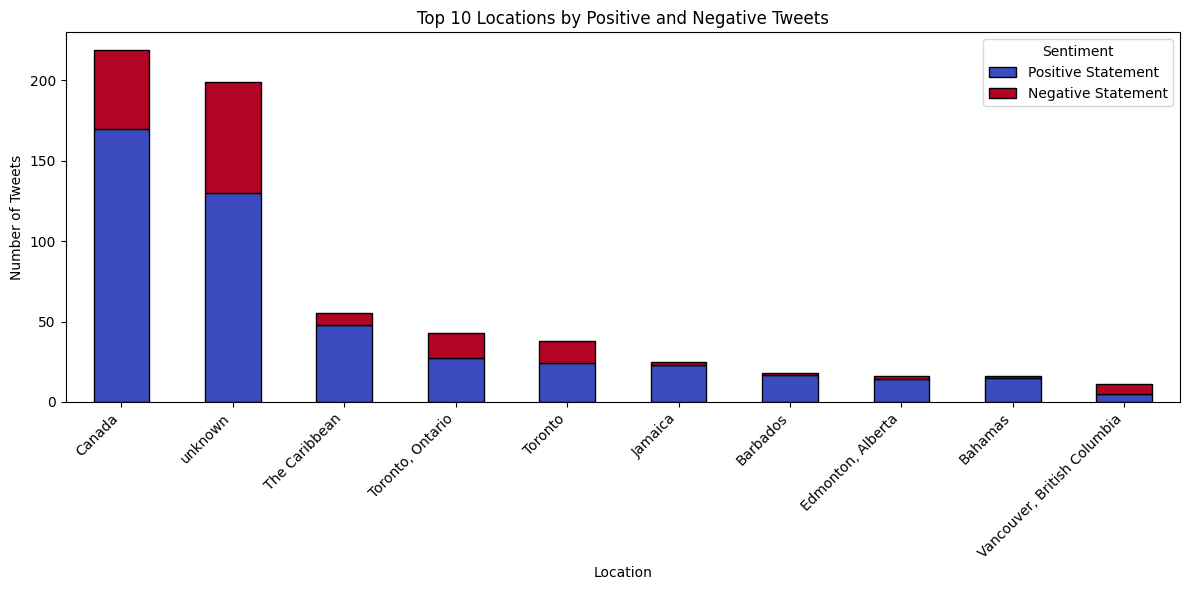

In [112]:
#Visualizing the positive and Negative tweets by Location wise

data_text=pd.DataFrame(data_text)
# Assuming df is your DataFrame
# Step 1: Filter only positive and negative tweets
data_filtered = data_text[data_text['sentimentType'].isin(['Positive Statement', 'Negative Statement'])]

# Step 2: Group by location and sentiment type
location_sentiment_counts = data_filtered.groupby(['location', 'sentimentType']).size().unstack(fill_value=0)

# Step 3: Calculate total tweets per location and sort
location_sentiment_counts['total'] = location_sentiment_counts.sum(axis=1)
top_locations = location_sentiment_counts.sort_values(by='total', ascending=False).head(10)

# Step 4: Plot
top_locations[['Positive Statement', 'Negative Statement']].plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='coolwarm',
    edgecolor='black'
)

plt.title("Top 10 Locations by Positive and Negative Tweets")
plt.xlabel("Location")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title="Sentiment")
plt.show()

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

X=data_text['text']
Y=data_text['sentimentType']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [50]:
vec = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vect = vec.fit_transform(X_train)
X_test_vect = vec.transform(X_test)

In [51]:
model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(X_train_vect, y_train)


y_pred = model.predict(X_test_vect)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [52]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7348066298342542


In [53]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Negative', 'Positive', 'Neutral']))


Classification Report:
               precision    recall  f1-score   support

    Negative       0.93      0.42      0.57        60
    Positive       0.68      0.80      0.73       147
     Neutral       0.76      0.80      0.78       155

    accuracy                           0.73       362
   macro avg       0.79      0.67      0.70       362
weighted avg       0.76      0.73      0.73       362



In [54]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[ 25  24  11]
 [  2 117  28]
 [  0  31 124]]


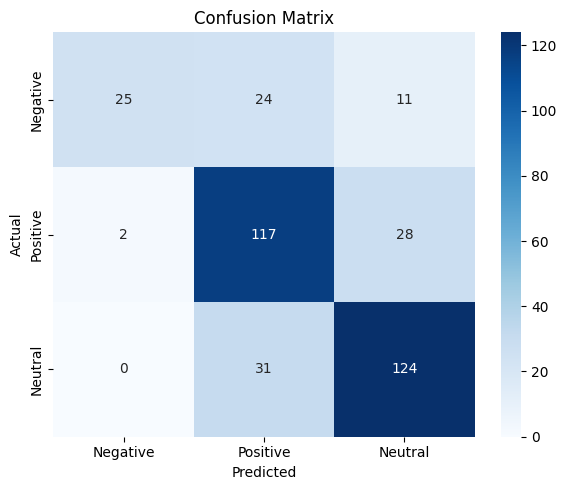

In [55]:
cm = confusion_matrix(y_test, y_pred)

# Define labels for better readability
labels = ['Negative', 'Positive', 'Neutral']

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()